<a href="https://colab.research.google.com/github/ifadadouglas-tech/Data-Science-Project-/blob/main/Customer_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RECOMMENDATION SYSTEM**


* A recommender system, or a recommendation system (sometimes replacing 'system' with a synonym such as platform or engine), is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.

* The systems entice users with relevant suggestions based on the choices they make.

* Examples: Recommender systems can also enhance experiences for: News Websites, Netflix, YouTube, Tinder, Amazon, etc.

* In this notebook, let's focus to build a recommendation system for the given Netflix Data.

**NETFLIX**

* Netflix is a streaming service that offers a wide variety of award-winning TV shows, movies, anime, documentaries and more – on thousands of internet-connected devices.

* You can watch as much as you want, whenever you want, without a single ad – all for one low monthly price. There's always something new to discover, and new TV shows and movies are added every week!



In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import math as math
import time


from datetime import date, datetime

from matplotlib.text import Text
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Polygon
from plotly import graph_objects as go
from collections import Counter
from scipy.stats import norm
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding
from sklearn.feature_extraction.text import TfidfVectorizer #TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator.
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans



In [ ]:
# upload dataset and save it on colab.

from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [ ]:
# Load the dataset from your current working directory

df1 = pd.read_csv("netflix_titles.csv")



In [ ]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df1.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df1.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


**DATA VISUALIZATION**

**WORDCLOUD**

Word clouds or tag clouds are visual representations of word frequency that give greater prominence to words that appear more frequently in a source text for a better evaluation. Words are usually single words, and the importance of each is shown with font size or color.

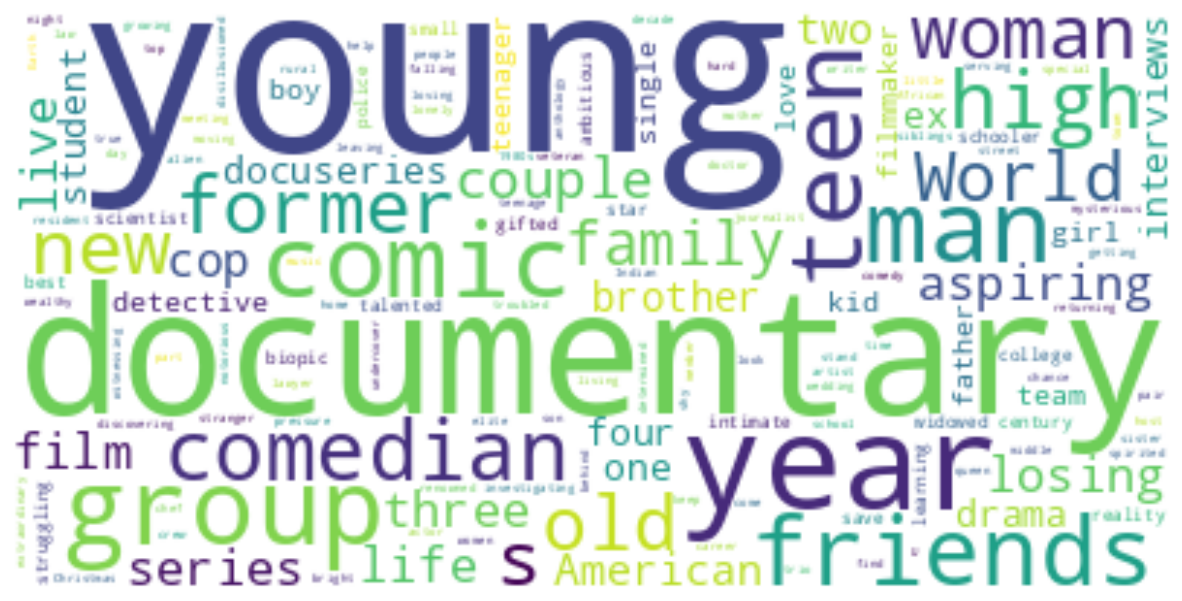

In [ ]:
text = " ".join(cat.split()[1] for cat in df1.description)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.figure(figsize=[15,15])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**VISUALIZATION OF HIGH RATED CONTENTS ON THE GIVEN NETFLIX DATA**





In [ ]:
ratings = pd.DataFrame({'Title':df1.title,
                    'Release Year':df1.release_year,
                    'Rating': df1.rating,
                    'Genre':df1.type})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape


(8807, 4)

In [ ]:
ratings.head()

,Title,Release Year,Rating,Genre
0,Dick Johnson Is Dead,2020,PG-13,Movie
1,Blood & Water,2021,TV-MA,TV Show
2,Ganglands,2021,TV-MA,TV Show
3,Jailbirds New Orleans,2021,TV-MA,TV Show
4,Kota Factory,2021,TV-MA,TV Show





MERGE

In [ ]:
joint_data=ratings.merge(df1,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)
#joint_data.head()

In [ ]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


**FUNNEL CHART**

** A funnel chart is a chart used to show how numbers decrease step-by-step through a process. Think of it like watching people drop off as they move from one stage to another.

** A funnel is a type of chart that shows progress through a series of linear and interconnected stages in which the data values typically decrease. One of the most common uses is in marketing and sales to show how the number of potential sales prospects gradually winnows to those who complete purchases.

** Funnel charts are often used to represent data in different stages of a business process. It’s an important mechanism in Business Intelligence to identify potential problem areas of a process. For example, it’s used to observe the revenue or loss in a sales process for each stage, and displays values that are decreasing progressively. Each stage is illustrated as a percentage of the total of all values.

**Simple idea**
Wide at the top ➝ narrow at the bottom.
Each step shows how many remain at that stage.

**Common examples.**

1. **Sales funnel**
* Leads → Qualified Leads → Proposals → Sales

2. **Website funnel**
Visitors → Sign-ups → Active Users → Paying Customers.

3. **Recruitment funnel**
Applicants → Shortlisted → Interviewed → Hired.

**Why use a funnel chart?**
* To see drop-off points
* To compare stages
* To identify where improvement is needed.

**Key features.**
* Stages are shown vertically or horizontally.

* Values decrease as you go down

* Shape looks like a funnel (🔻)

In [ ]:
fig = go.Figure(go.Funnel(
    y = ["United States", "India", "United Kingdom", "Japan", "South Korea", "Canada", "Spain"],
    x = [2818,972,419,245,199,181,145],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.85, marker = {"color": ["firebrick", "lightsalmon", "tan", "teal", "skyblue","lightsalmon","lightgray"],
    "line": {"width": [5, 5, 4,4,3,3,4], "color": ["wheat", "wheat", "lightsalmon",  "blue", "wheat", "yellow","lightsalmon"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 6}})
    )

fig.show()

**TREE MAP**

* Treemaps are visualizations for hierarchical data. They are made of a series of nested rectangles of sizes proportional to the corresponding data value. A large rectangle represents a branch of a data tree, and it is subdivided into smaller rectangles that represent the size of each node within that branch.

* Let us view the Tree map of Turkey in detail for example or use any other country if you like.

In [ ]:
netflix_Turkey=df1[df1['country']=='Turkey']
nannef=netflix_Turkey.dropna()

fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','type'],color_continuous_scale='Purples')
fig.show()

***Let's use another country***

In [ ]:
netflix_Egypt=df1[df1['country']=='Egypt']
nannef=netflix_Egypt.dropna()

fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','type'],color_continuous_scale='Purples')
fig.show()

**YEAR WISE ANALYSIS ON THE GIVEN NETFLIX DATA**

**COUNTPLOT**

* countplot() function for visualizing data of your machine learning or data science project. The countplot is majorly used for showing the observational count in different category based bins with the help of bars. The main idea of the count plot is similar to barplot() function.

* In simple terms, countplot() method is used to Show the counts of observations in each categorical bin using bars.

/tmp/ipython-input-1816339907.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




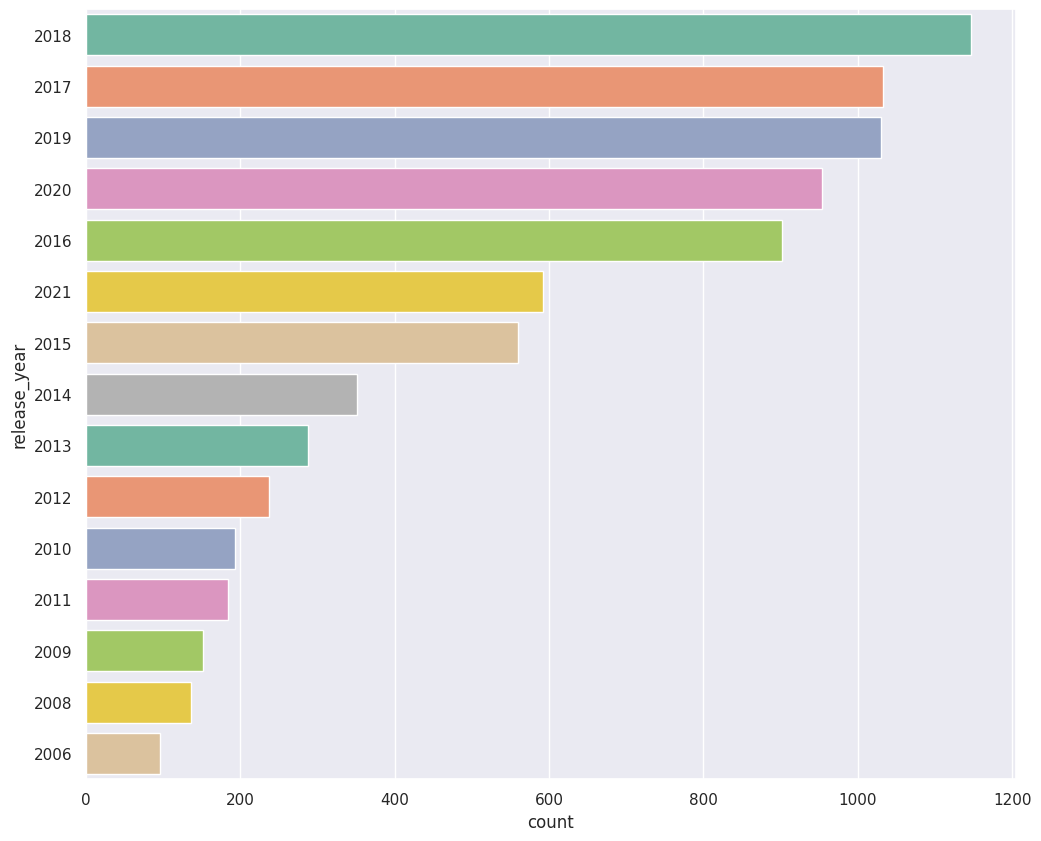

In [ ]:
#year wise analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df1, palette="Set2", order=df1['release_year'].value_counts().index[0:15])

**LOLLIPOP PLOT OF GENRES vs THEIR COUNT ON THE GIVEN NETFLIX DATA**

* A lollipop chart (LC) is a handy variation of a bar chart where the bar is replaced with a line and a dot at the end. They are two-dimensional with two axes: one axis shows categories or a time series, the other axis shows numerical values.

In [ ]:
genres=list(df1['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)
g

Counter({'Documentaries': 869,
         'InternationalTVShows': 1351,
         'TVDramas': 763,
         'TVMysteries': 98,
         'CrimeTVShows': 470,
         'TVAction&Adventure': 168,
         'Docuseries': 395,
         'RealityTV': 255,
         'RomanticTVShows': 370,
         'TVComedies': 581,
         'TVHorror': 75,
         'Children&FamilyMovies': 641,
         'Dramas': 2427,
         'IndependentMovies': 756,
         'InternationalMovies': 2752,
         'BritishTVShows': 253,
         'Comedies': 1674,
         'Spanish-LanguageTVShows': 174,
         'Thrillers': 577,
         'RomanticMovies': 616,
         'Music&Musicals': 375,
         'HorrorMovies': 357,
         'Sci-Fi&Fantasy': 243,
         'TVThrillers': 57,
         "Kids'TV": 451,
         'Action&Adventure': 859,
         'TVSci-Fi&Fantasy': 84,
         'ClassicMovies': 116,
         'AnimeFeatures': 71,
         'SportsMovies': 219,
         'AnimeSeries': 176,
         'KoreanTVShows': 151,
        

/tmp/ipython-input-2243965441.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



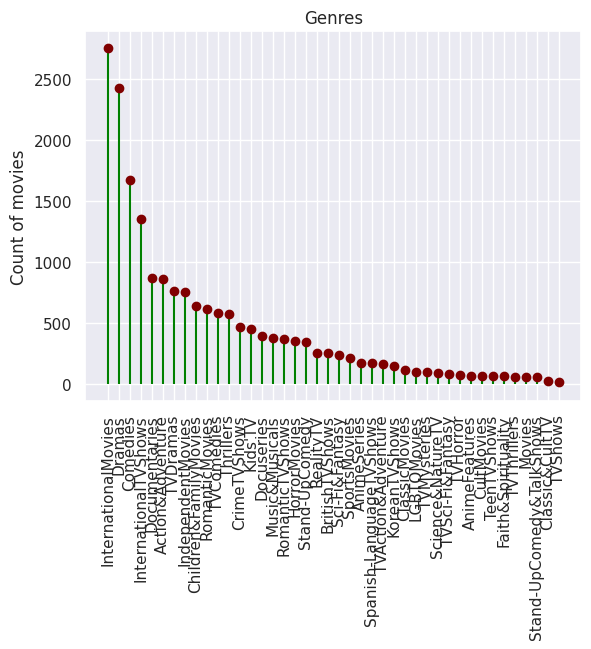

<Figure size 1500x1500 with 0 Axes>

In [ ]:
#Lollipop plot of Genres vs their count on Netflix

g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (15, 15))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

<Axes: xlabel='rating'>

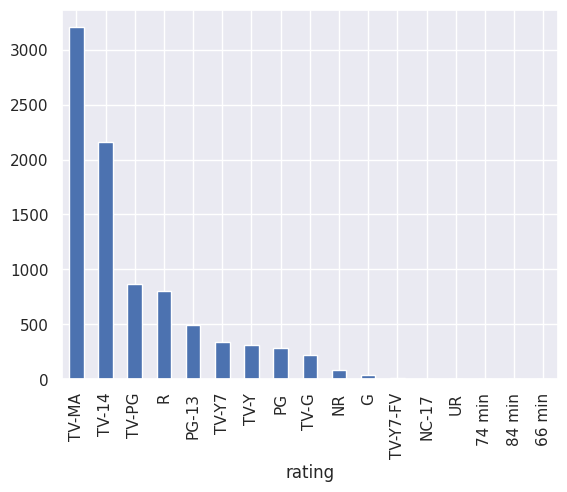

In [ ]:
#visualize the distribution of ratings for all titles
#matplotlib df1(x - ratings vs y-total)

allRatings = df1.rating.value_counts()
allRatings.plot(kind='bar')

**TV SHOWS vs MOVIES WITH RESPECT TO THE GIVEN NETFLIX DATA**

In [ ]:
colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
        'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
        'rgba(190, 192, 213, 1)']

fig = px.histogram(df1,
                   y="type",
                   orientation='h',
                   width=600,
                   height=350,
                   histnorm='percent',
                   template="plotly_dark"
                   )
fig.update_layout(title="<b>Netflix Content: TV Show vs Movies<b>",
                  font_family="San Serif",
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 28},
                  paper_bgcolor='lightgray',
                  plot_bgcolor='lightgray',
                  legend=dict(
                  orientation="v",
                      y=1,
                      yanchor="top",
                      x=1.250,
                      xanchor="right",)
                  )
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.0, y=1.2,
                        text='Netflix mostly produce Movies over TV shows.',
                             font=dict(family='Arial', size=16, color=colors[2]),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=0.49, y=0.85,
                        text='30.4%',
                             font=dict(family='Arial', size=20, color=colors[2]),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=1.09, y=0.19,
                        text='69.6%',
                             font=dict(family='Arial', size=20, color=colors[2]),
                        showarrow=False))

fig.update_layout(
    autosize=False,
    width=600,
    height=350,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=120,
    ),
)

fig.update_layout(annotations=annotations)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**From the above plot, we can observe that nearly 2/3rd of the content on netflix are movies(69.6%) while the rest are TV Shows(30.4%).**

In [ ]:
df_tv = df1[df1["type"] == "TV Show"]
df_movies = df1[df1["type"] == "Movie"]

**TOP MOVIE & TV SHOW RATINGS BASED ON RATING SYSTEM**

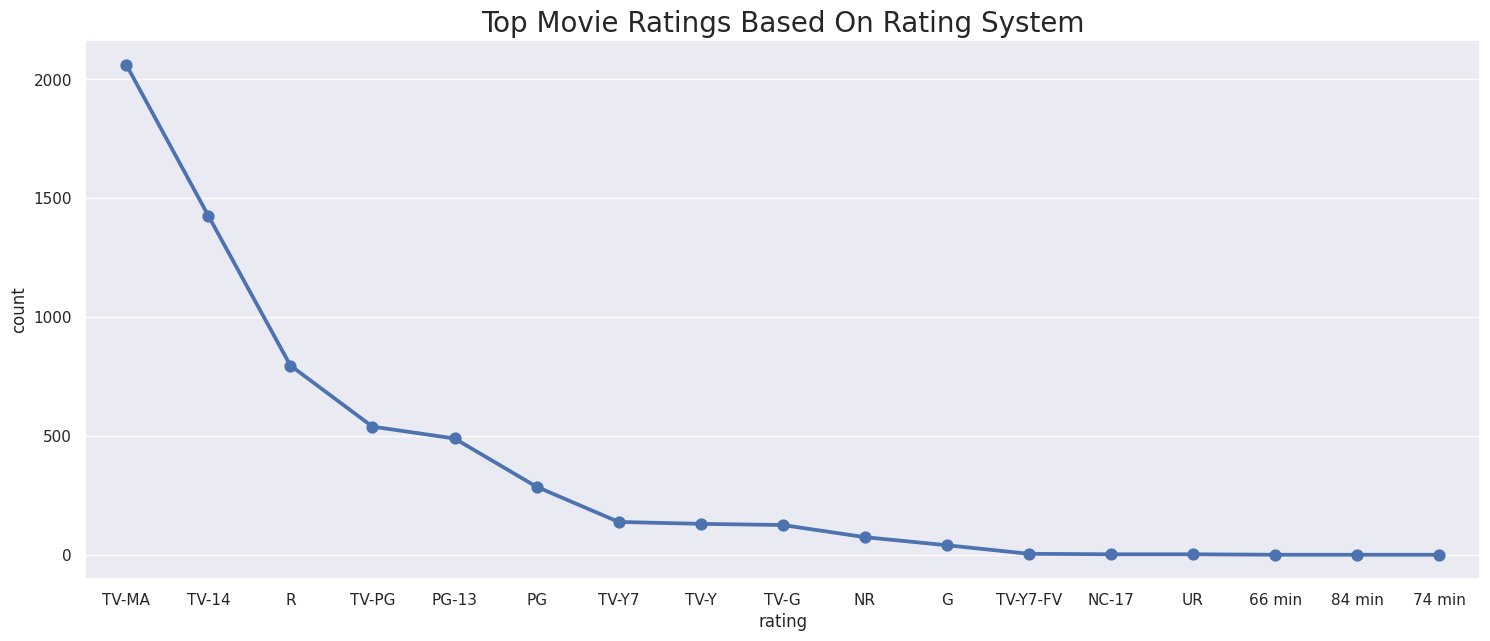

In [ ]:
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

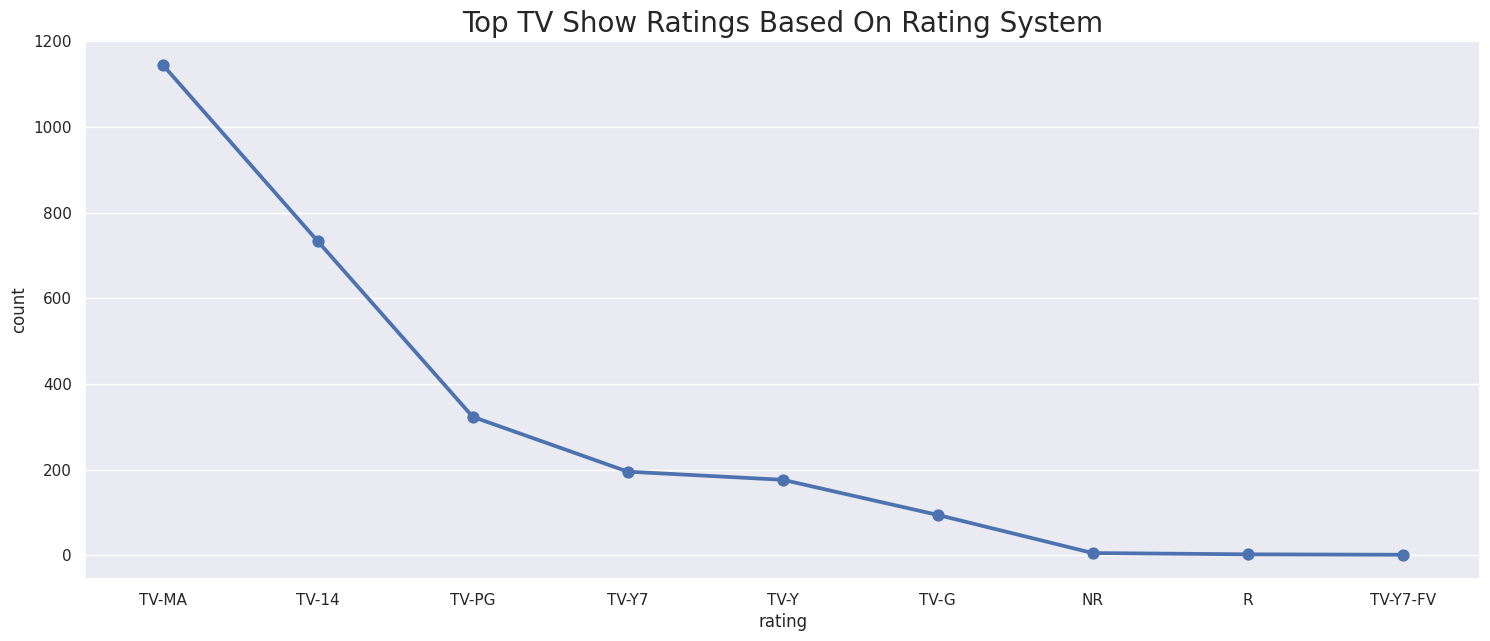

In [ ]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

**DISTRIBUTION OF MOVIE & TV SHOW RATING ACCORDING TO AGE GROUPS**

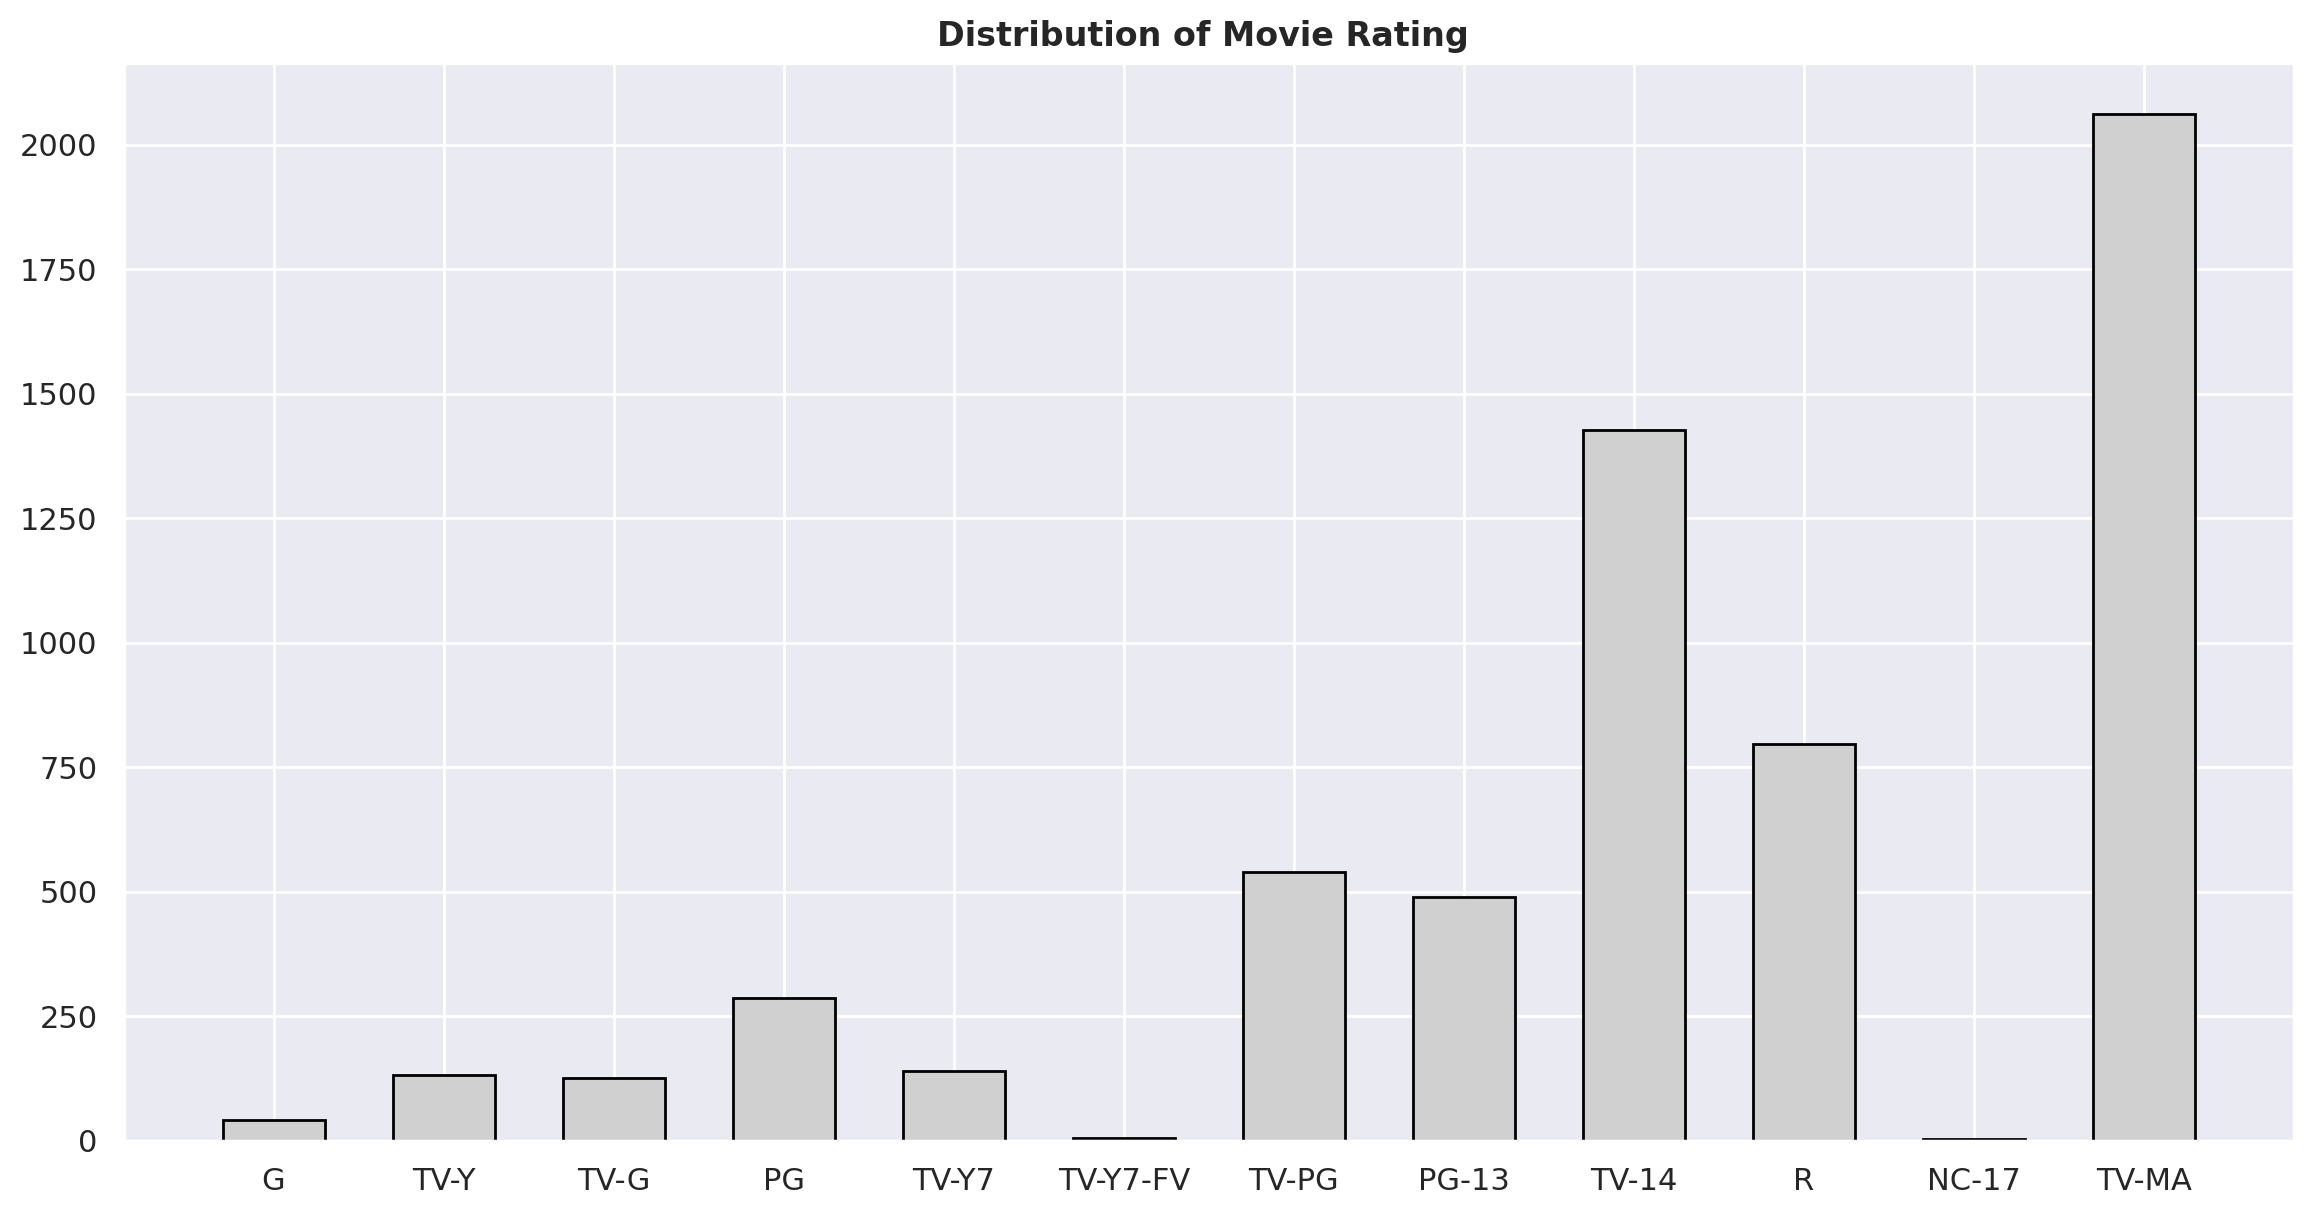

In [ ]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]



fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
ax.bar(movie_rating.index, movie_rating,  color="#d0d0d0", width=0.6, edgecolor='black')
ax.set_title(f'Distribution of Movie Rating ', fontweight='bold')
plt.show()

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df1['target_ages'] = df1['rating'].replace(ratings_ages)
df1['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min', nan], dtype=object)

In [ ]:
def generate_rating_df(df1):
    rating_df = df1.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [ ]:
rating_df = generate_rating_df(df1)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies And TV Shows Based On Target Age Groups',  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()


In [ ]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

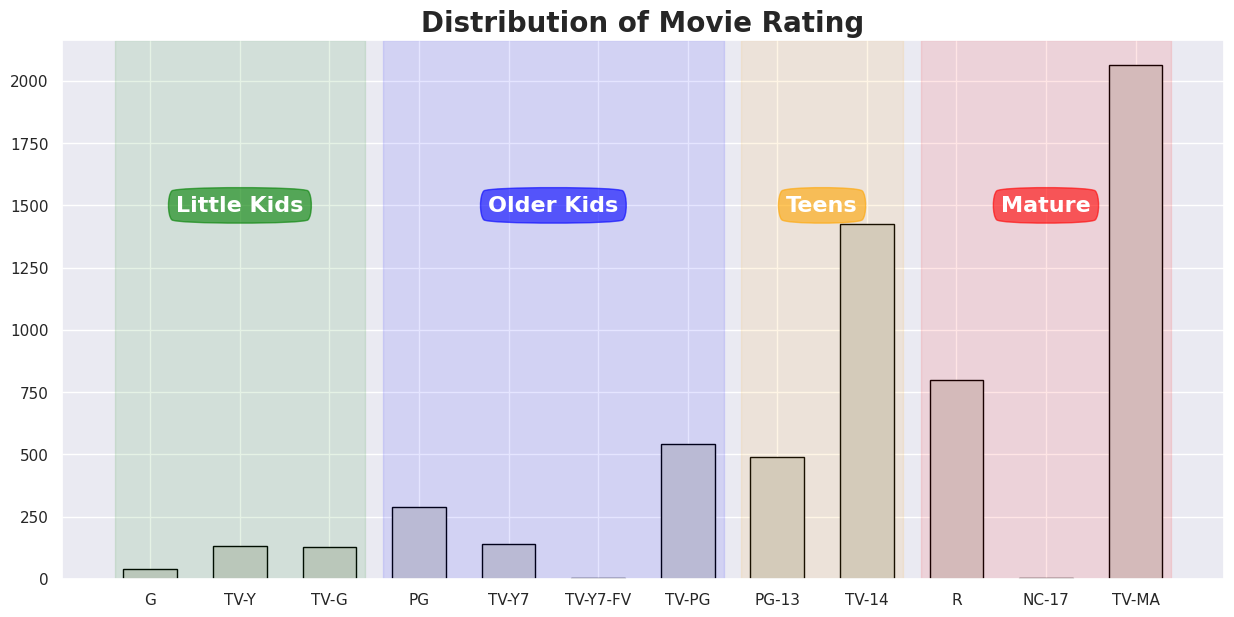

In [ ]:
rating_barplot(movie_rating,'Movie', 1500)

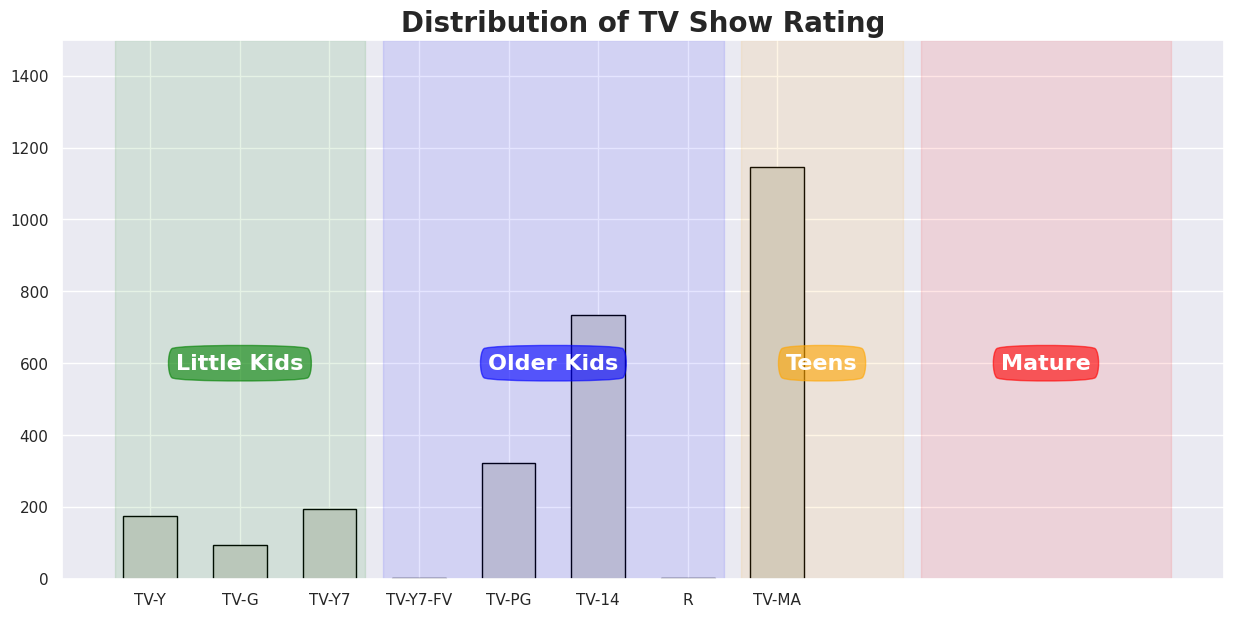

In [ ]:
rating_barplot(tv_rating,'TV Show' , 600, 1500)

**RELATIONSHIP BETWEEN EACH GENRE BY MOVIE & TV SHOW**


In [ ]:
# preprocessing
sns.set_style('whitegrid') # plot with grid

movie = df1[df1['type'] == 'Movie']
tv_show = df1[df1['type'] == 'TV Show']

rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order]

In [ ]:
def relation_heatmap(df1, title):
    df1['genre'] = df1['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
    Types = []
    for i in df1['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")
    test = df1['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})

    plt.show()

/tmp/ipython-input-437887608.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are 20 types in the Netflix Movie Dataset


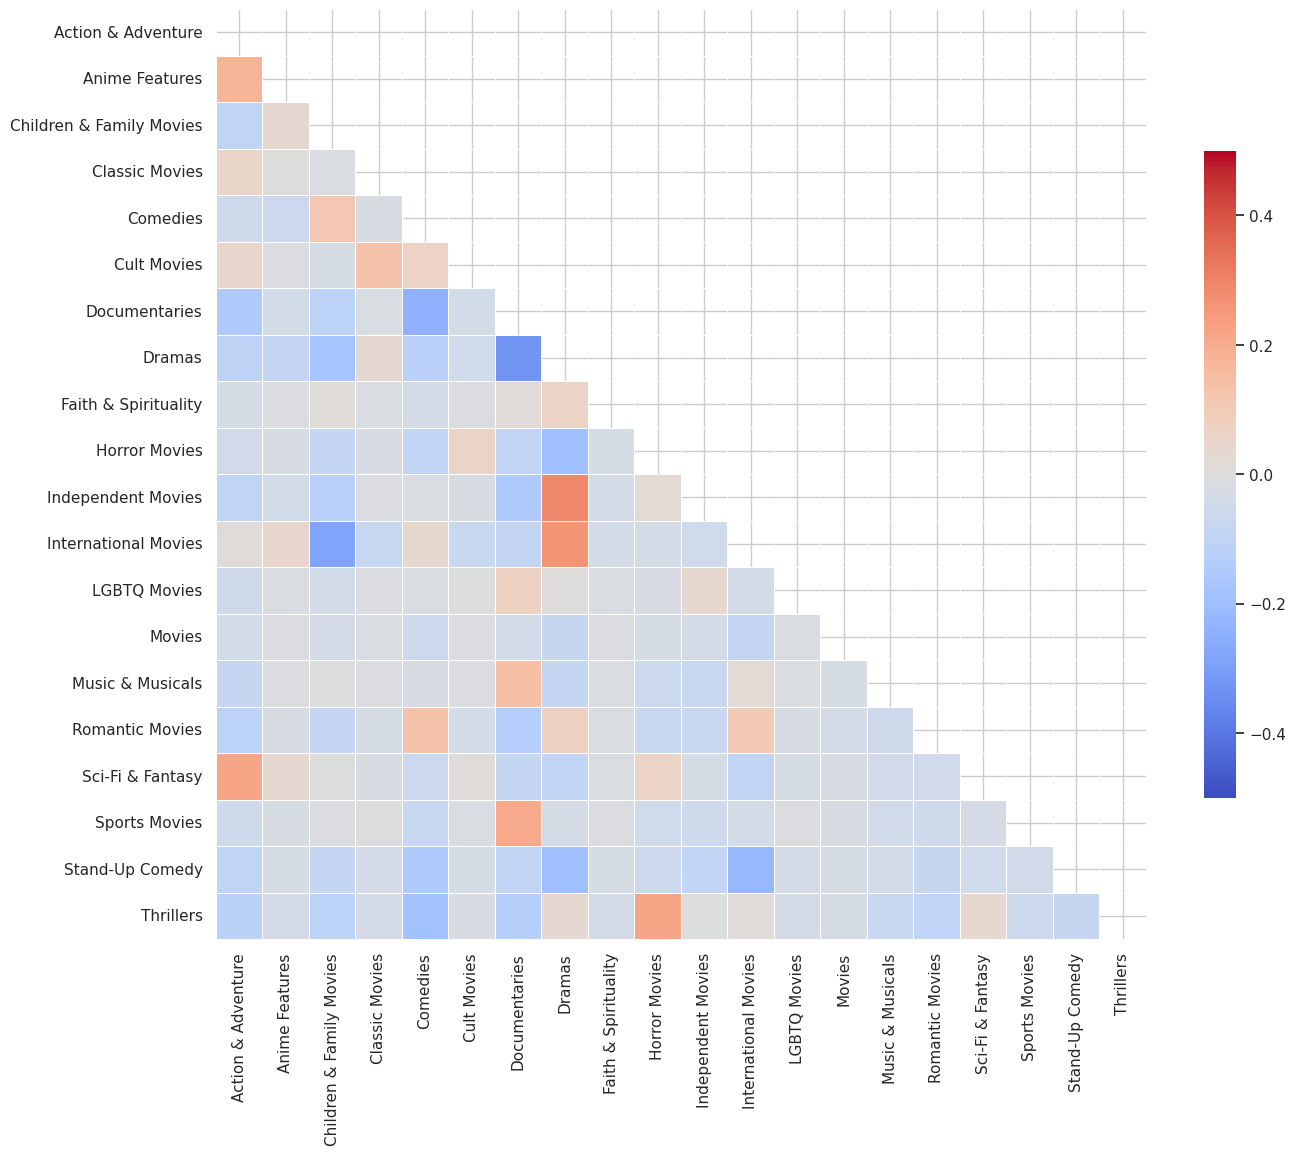

In [ ]:
relation_heatmap(movie, 'Movie')

/tmp/ipython-input-437887608.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are 22 types in the Netflix TV Show Dataset


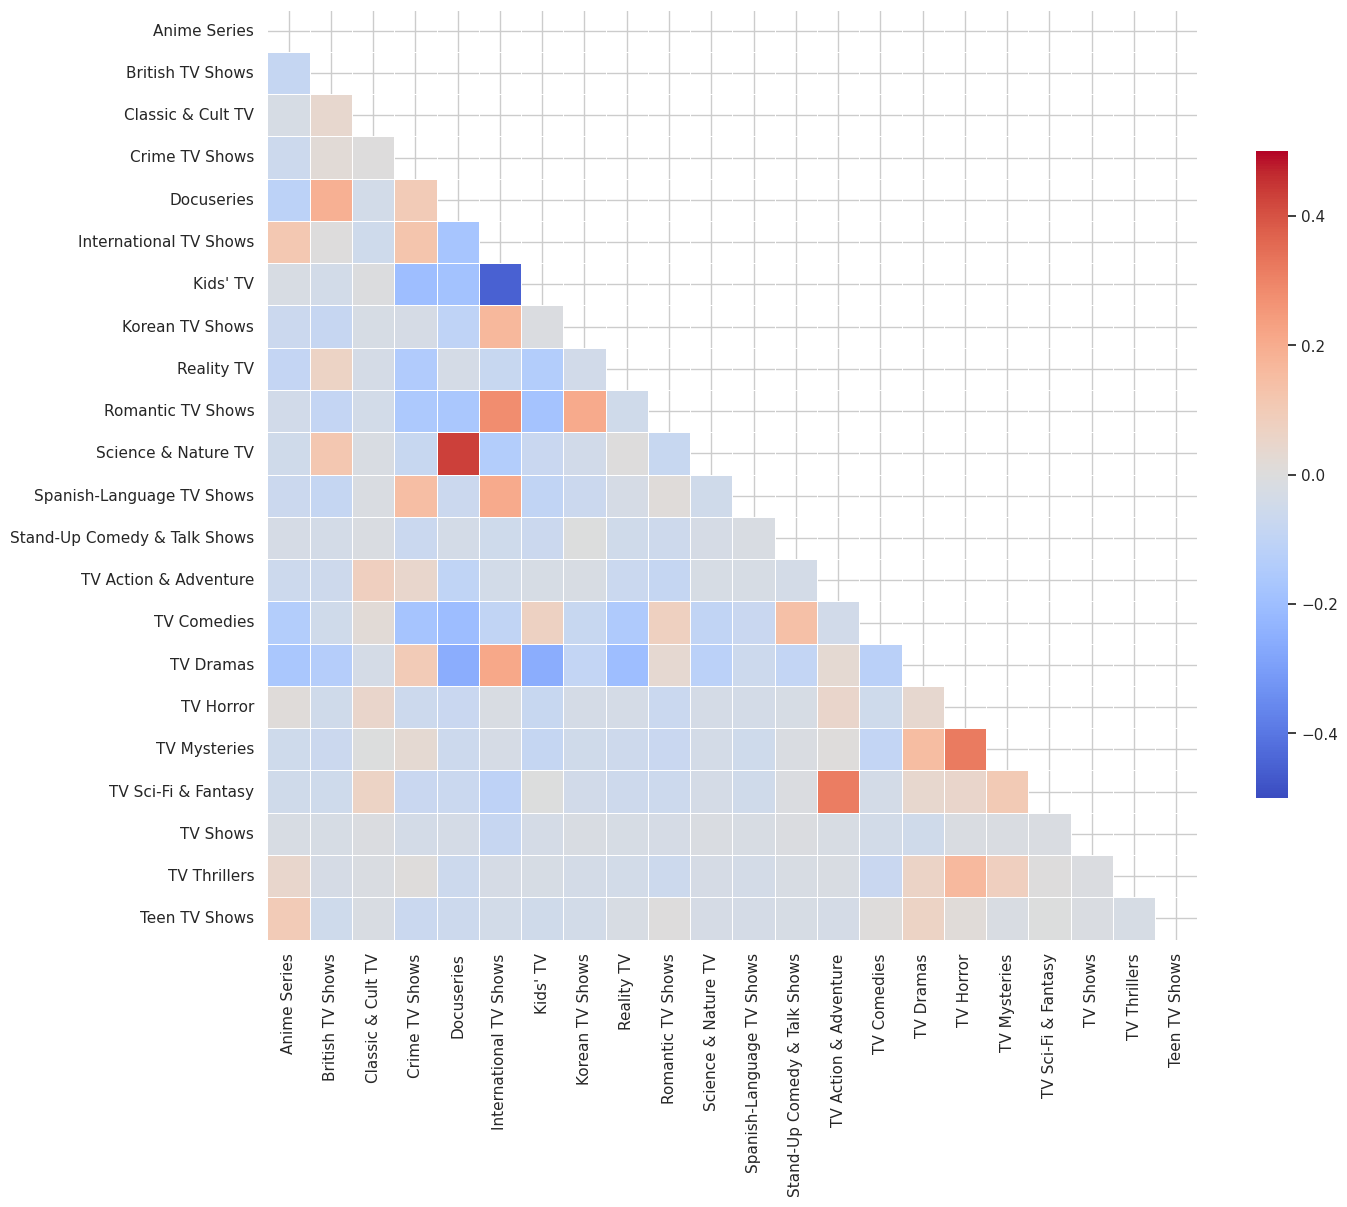

In [ ]:
relation_heatmap(tv_show, 'TV Show')

**ANALYSIS ON DURATION FOR MOVIES & TV SHOWS**

<>:2: SyntaxWarning:

invalid escape sequence '\d'

<>:2: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipython-input-3149849189.py:2: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipython-input-3149849189.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




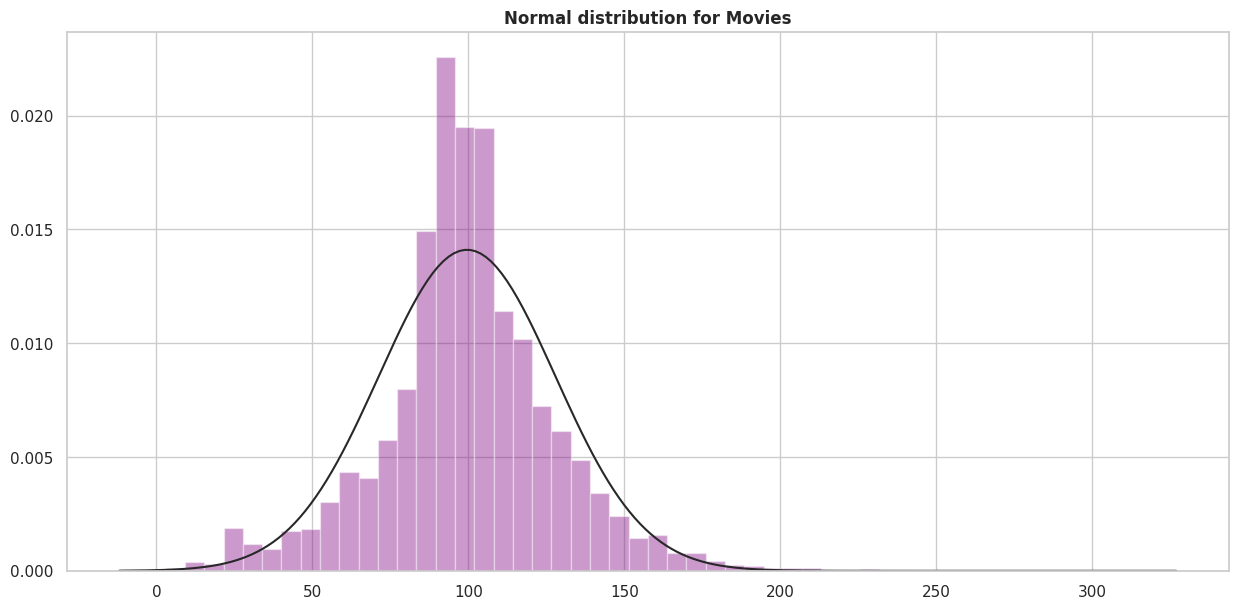

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=['Purple'])
plt.title('Normal distribution for Movies',fontweight="bold")
plt.show()

In [ ]:
fig = px.histogram(x=df_tv['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of TV Shows duration",
    xaxis_title="Duration of TV ShowS",
)
fig.show()

**RECOMMENDATION SYSTEM WITH NETWORKX:**


* Recommendation systems help the users to get personalized recommendations, helps users to take correct decisions in their online transactions, increase sales and redefine the users web browsing experience, retain the customers, enhance their shopping experience.

* Here, let us calculate the TF-IDF matrix and for each movie, take the top 5 of similar descriptions and create a node . This node will be taken in account, in the Adamic Adar measure.


**Adamic Adar measure**

The Adamic–Adar measure is the sum of the log of the intersection of the neighbors of two nodes. This captures a two-hop similarity, which can yield better results than simple one-hop methods.In simple terms, it is a measure used to compute the closeness of nodes based on their shared neighbors.

* x and y are 2 nodes (2 Movies)
* N(one_node) is a function that return the set of adjacent nodes to one_node


The Adamic–Adar measure is a link prediction / similarity metric used in network (graph) analysis. It tells you how similar two nodes are based on their shared neighbors, giving more weight to rare (low-degree) neighbors.

**Simple idea:**
Two nodes are considered more similar if:
1. They have common neighbors, and
2. Those common neighbors don’t connect to many other nodes.

So, a rare mutual friend counts more than a popular one.


The Adamic-Adar (AA) index is a network science metric created in year 2003 to predict links or measure similarity between two nodes based on shared neighbors.

It calculates the sum of the inverse logarithmic degrees of common neighbors, giving higher weight to neighbors with fewer connections.

This method, often used in libraries like NetworkX, calculates similarity based on the structure of the network rather than just the number of shared neighbors

**TF-IDF (Term Frequency-Inverse Document Frequency) & Cosine similarity**

* TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

* Cosine similarity is one of the metric to measure the text-similarity between two documents irrespective of their size in Natural language Processing. A word is represented into a vector form. The text documents are represented in n-dimensional vector space.


* In simple terms,

1. TF-IDF will give you a representation for a given term in a document.

2. Cosine similarity will give you a score for two different documents that share the same representation.

In [ ]:
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]

In [ ]:

df1["date_added"] = pd.to_datetime(df1["date_added"],format="%m-%d-%Y", errors="coerce")


In [ ]:

df1['directors'] = df1['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df1['categories'] = df1['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df1['actors'] = df1['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df1['countries'] = df1['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

**Mini-batch K-means clustering algorithm**

* The Mini-batch K-means clustering algorithm is a version of the standard K-means algorithm in machine learning. It uses small, random, fixed-size batches of data to store in memory, and then with each iteration, a random sample of the data is collected and used to update the clusters.

* Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence.

In [ ]:
# Build the tfidf matrix with the descriptions
start_time = time.time()
text_content = df1['description']
vector = TfidfVectorizer(max_df=0.4,         # drop words that occur in more than X percent of documents
                             min_df=1,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf = vector.fit_transform(text_content)

In [ ]:
# Clustering  Kmeans
k = 200
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
#terms = vector.get_feature_names()

request_transform = vector.transform(df1['description'])

# new column cluster based on the description

df1['cluster'] = kmeans.predict(request_transform)

df1['cluster'].value_counts().head()


,count
cluster,
147,6266
62,1081
109,649
12,218
178,136


In [ ]:
P = nx.Graph(label="MOVIE")
start_time = time.time()
for i, rowi in df1.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    P.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])
    P.add_node(rowi['cluster'],label="CLUSTER")
    P.add_edge(rowi['title'], rowi['cluster'], label="DESCRIPTION")
    for element in rowi['actors']:
        P.add_node(element,label="PERSON")
        P.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['categories']:
        P.add_node(element,label="CAT")
        P.add_edge(rowi['title'], element, label="CAT_IN")
    for element in rowi['directors']:
        P.add_node(element,label="PERSON")
        P.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['countries']:
        P.add_node(element,label="COU")
        P.add_edge(rowi['title'], element, label="COU_IN")

    indices = find_similar(tfidf, i, top_n = 5)
    snode="Sim("+rowi['title'][:15].strip()+")"
    P.add_node(snode,label="SIMILAR")
    P.add_edge(rowi['title'], snode, label="SIMILARITY")
    for element in indices:
        P.add_edge(snode, df1['title'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time))


 iter 0 -- 0.010751962661743164 seconds --
 iter 1000 -- 3.5077834129333496 seconds --
 iter 2000 -- 6.313327789306641 seconds --
 iter 3000 -- 9.09985613822937 seconds --
 iter 4000 -- 11.818549156188965 seconds --
 iter 5000 -- 15.024863481521606 seconds --
 iter 6000 -- 17.778727531433105 seconds --
 iter 7000 -- 20.610015392303467 seconds --
 iter 8000 -- 23.31626844406128 seconds --
 finish -- 26.028648376464844 seconds --


In [ ]:
def get_recommendation(root):
    commons_dict = {}
    for h in P.neighbors(root):
        for h2 in P.neighbors(h):
            if h2==root:
                continue
            if P.nodes[h2]['label']=="MOVIE":
                commons = commons_dict.get(h2)
                if commons==None:
                    commons_dict.update({h2 : [h]})
                else:
                    commons.append(h)
                    commons_dict.update({h2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for h in values:
            w=w+1/math.log(P.degree(h))
        movies.append(key)
        weight.append(w)

    final = pd.Series(data=np.array(weight),index=movies)
    final.sort_values(inplace=True,ascending=False)
    return final;

In [ ]:
final1 = get_recommendation("PK")
final2 = get_recommendation("Ocean's Thirteen")
final3 = get_recommendation("The Devil Inside")
final4 = get_recommendation("Stranger Things")
print("*"*40+"\n Recommendation for 'PK\n"+"*"*40)
print(final1.head())
print("*"*40+"\n Recommendation for 'Ocean's Thirteen'\n"+"*"*40)
print(final2.head())
print("*"*40+"\n Recommendation for 'Belmonte'\n"+"*"*40)
print(final3.head())
print("*"*40+"\n Recommendation for 'Stranger Things'\n"+"*"*40)
print(final4.head())

****************************************
 Recommendation for 'PK
****************************************
3 Idiots                                        2.107430
Sanju                                           1.612039
Have You Ever Seen Fireflies? - Theatre Play    1.574336
Merku Thodarchi Malai                           1.514608
Drive                                           1.483742
dtype: float64
****************************************
 Recommendation for 'Ocean's Thirteen'
****************************************
Ocean's Twelve       6.325286
The Departed         2.213117
Ocean's Eleven       2.193202
Hostel: Part III     1.910463
Brooklyn's Finest    1.563403
dtype: float64
****************************************
 Recommendation for 'Belmonte'
****************************************
The Boy                                  1.891867
Lying and Stealing                       1.721734
The Devil and Father Amorth              1.551258
Making a Murderer                        1.38

In [ ]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for q in list_in:
        sub_graph.add(q)
        for h in P.neighbors(q):
                sub_graph.add(h)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = P.subgraph(sub_graph)
    colors=[]
    for h in subgraph.nodes():
        if P.nodes[h]['label']=="MOVIE":
            colors.append('blue')
        elif P.nodes[h]['label']=="PERSON":
            colors.append('red')
        elif P.nodes[h]['label']=="CAT":
            colors.append('green')
        elif P.nodes[h]['label']=="COU":
            colors.append('yellow')
        elif P.nodes[h]['label']=="SIMILAR":
            colors.append('orange')
        elif P.nodes[h]['label']=="CLUSTER":
            colors.append('orange')

    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()

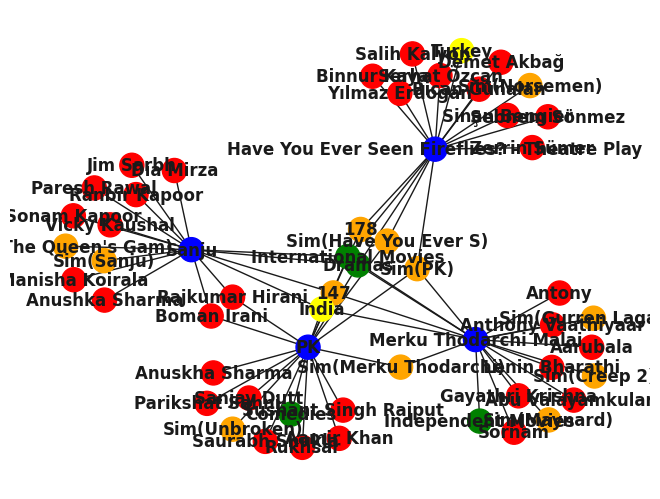

In [ ]:
#visualizing the recommendation for "PK"

reco=list(final1.index[:4].values)
reco.extend(["PK"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

**INFERENCE**

* From the above visualization,we can observe the recommendations for **PK movie** as **3 Idiots**, **Sanju**, **Merku Thodarchi Malai** & **Chance Pe Dance movies** with **blue coloured nodes**.

* The casts of the movie are represented by red coloured nodes. It is curious to observe that **Aamir Khan(with red coloured node indicating cast of a movie here)** is mutual to **PK & 3 idiots movies** as we all know.

* The **genre** of the movies such as **Comedy ,Drama** are indicated by **green coloured nodes.**

* The **similarity & clusters** are indicated by **orange coloured nodes.**

* **Country** is represented by **yellow coloured nodes.**

**CONCLUSION**

* Hence, in this notebook we have built a recommendation system for the given Netflix Data.

* The personalised recommendation algorithm drive customer retention in a friendly manner.The product recommendation technology helps build strong relationships between businesses and customers.

* Data analytics is the fuel that powers any subscription-based streaming service. It doesn't just work in managing content, movies, TV shows and entertainment but it has a lot of other data to handle as well. There is no efficient way other than “Big data” to handle such enormous amounts of data efficiently !!